# First glance on TSLA stock

In [3]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 1, 1)

df = web.DataReader("TSLA", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,314.500000,295.200012,313.500000,295.390015,5559900,295.390015
2018-12-26,326.970001,294.089996,300.000000,326.089996,8163100,326.089996
2018-12-27,322.170013,301.500000,319.839996,316.130005,8575100,316.130005
2018-12-28,336.239990,318.410004,323.100006,333.869995,9939000,333.869995
2018-12-31,339.209991,325.260010,337.790009,332.799988,6302300,332.799988


In [4]:
# calculate moving average
window = 100
close_px = df['Adj Close']
mavg = close_px.rolling(window=window).mean()

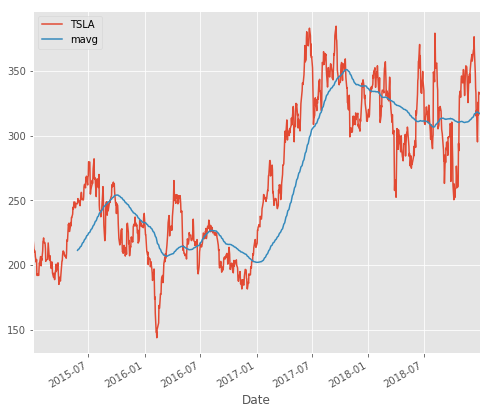

In [6]:
# initial plotting
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='TSLA')
mavg.plot(label='mavg')
plt.legend()

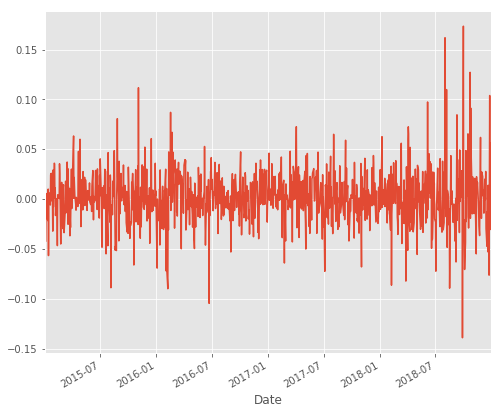

In [7]:
# find expected returns
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

# Analyze other stocks

In [9]:
# read in data
dfcomp = web.DataReader(['AAPL', 'GOOG', 'AMZN', 'FB', 'MSFT'], 'yahoo', start=start, end=end)['Adj Close']
dfcomp.head()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2015-01-02,100.755898,308.519989,78.449997,523.373108,42.122040
2015-01-05,97.917427,302.190002,77.190002,512.463013,41.734680
2015-01-06,97.926666,295.290009,76.150002,500.585632,41.122128
2015-01-07,99.299805,298.420013,76.150002,499.727997,41.644604
2015-01-08,103.115128,300.459991,78.180000,501.303680,42.869705


In [12]:
# correlation analysis
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Symbols,,,,,
AAPL,1.000000,0.480656,0.456533,0.512241,0.566014
AMZN,0.480656,1.000000,0.564170,0.651683,0.613279
FB,0.456533,0.564170,1.000000,0.607919,0.514392
GOOG,0.512241,0.651683,0.607919,1.000000,0.668180
MSFT,0.566014,0.613279,0.514392,0.668180,1.000000


Text(0, 0.5, 'Returns MSFT')

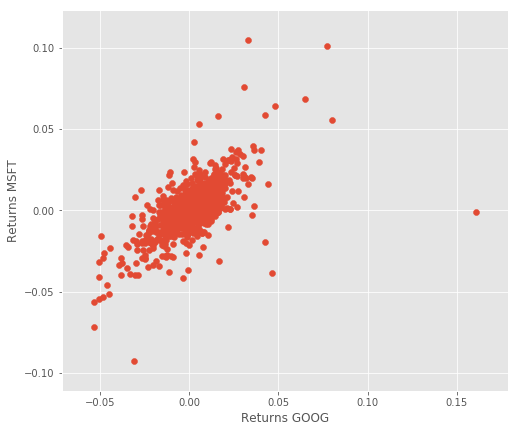

In [13]:
# plot scatter return of GOOG and MSFT
plt.scatter(retscomp.GOOG, retscomp.MSFT)
plt.xlabel('Returns GOOG')
plt.ylabel('Returns MSFT')

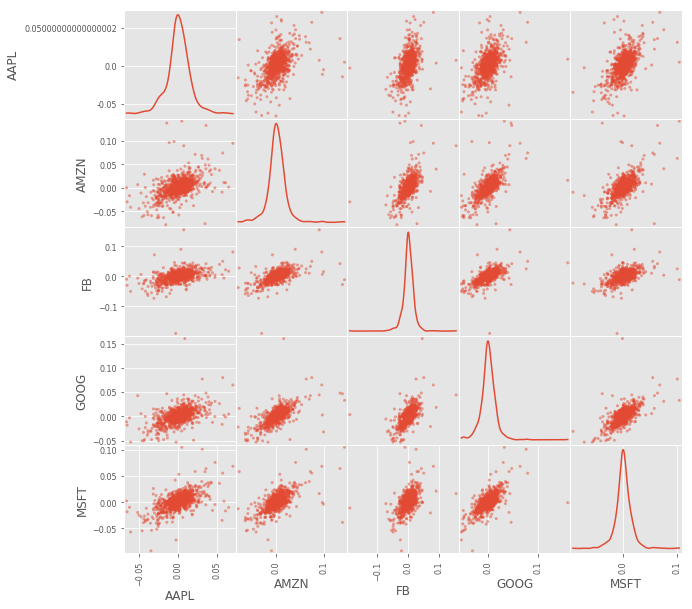

In [15]:
# plot scatter matrix
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

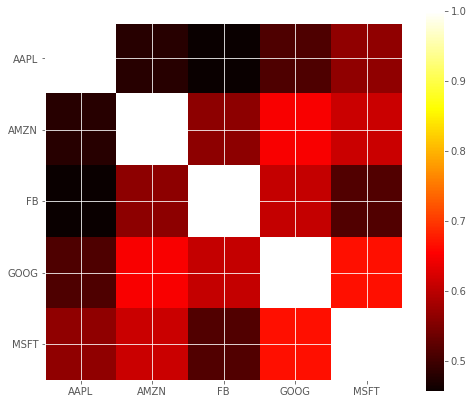

In [16]:
# heat map visualization
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

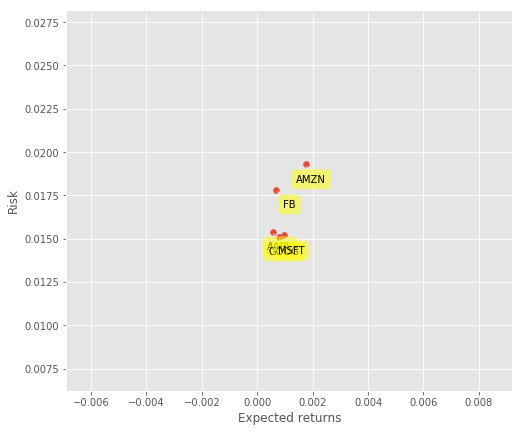

In [18]:
# plot return rates and risks
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label, xy=(x,y), xytext=(20,-20), textcoords='offset points', ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='yellow',alpha=0.5), arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Predicting stock price